# Multilayer Neural Networks

The limitation on perceptrons to linear decision boundaries stymied neural network development. However, eventually (the 1980s I believe) there was a break through that found an architecture that does allow for nonlinear decision boundaries, multilayer networks.

## What we will accomplish

In this notebook we will:
- Introduce the multilayer network architecture,
- Demystify <i>backpropagation</i> and
- Demonstrate how to implement a multilayer network in `sklearn`.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

## Feed forward network architecture

The class of multilayer networks we examine in this notebook are known as <i>feed forward networks</i>. Let's first show an image and then use that image for our explanation.

<img src="multilayer.png" width="60%"></img>

As you might be able to see they are called feed forward networks because each layer feeds directly into the next one.

In particular we have drawn a feed forward network with $2$ <i>hidden layers</i> each with dimension $3$, we call these hidden layers because we only see what is put into the input layer and what comes out of the output layer. So in some sense what goes on in the middle layers is "hidden" to us.

Note that neural networks can have more complex architectures. We touch on these in later notebooks.

## Mathematical setup

Suppose that we have $n$ observations of $m$ features, let $x$ represent a single observation as an $m$ by $1$ vector. Further, suppose we have $k$ hidden layers and that layer $l$ has $p_l$ nodes within it, and take $h_l$ to denote the vector corresponding to hidden layer $l$. Also suppose that the output layer has $o$ nodes. Let $W_1$ be a $p_1$ by $m$ weight matrix, for $l = 2,\dots, k$ let $W_l$ be a $p_l$ by $p_{l-1}$ weight matrix, and let $W_{k+1}$ be an $o$ by $p_k$ weight matrix. Finally take $\Phi$ to be some activation function.

Then we can set up how the output of the network is calculated with these recursively defined equations:
$$
\begin{array}{l l r}
h_1 =  & \Phi (W_1 x) & \text{Input to Hidden Layer }1 \\
h_{l+1} = & \Phi (W_{l+1} h_l) \ \forall l = 1, 2, \dots, k-1 & \text{Hidden Layer } l \text{ to Hidden Layer } l+1 \\
\hat{y} = & \Phi(W_{k+1} h_k) & \text{Hidden Layer } k \text{ to Output Layer}
\end{array}
$$

For now we stick with an abstract activation function, but we will mention a number of options before ending the notebook.

Sometimes you may see architecture diagrams that represent the nodes as giant rectangles meant to represent the vectors in the recursive equations.

<img src="multilayer2.png" width="60%"></img>

### Fitting the multilayer network, <i>backpropagation</i>

<i>Backpropagation</i> is how we find the optimal weight vector, $w$, it is really just a fancy name for the chain rule mixed with gradient descent. Let's demonstrate with a simple architecture.

<img src="simple.png" width="60%">

In this architecture we have: 

$$
h_1 = \Phi (w_1 x_1),
$$

$$
h_2 = \Phi (w_2 h_1),
$$

$$
\hat{y} = \Phi(w_3 h_2).
$$

Backpropagation consists of a <i>forwards step</i> and a <i>backwards step</i>.


#### The forwards step

Let $w = \left(w_1, w_2, w_3\right)^T$. As with the perceptron we initialize $w$ with random weights. Then run a randomly selected training point, $x^{(i)}$ through the network getting the values for each layer of the network along the way.

So when the forward step is completed you have a $\hat{y}$ and $\hat{h}$s for each layer of the network.

#### The backwards step

The backwards step is how we update our weights, $w$. Let our cost function be $C = (\hat{y} - y)^2$.

In order to update $w$ we use gradient descent, so $w_{\text{new}} = w_\text{old} - \eta \nabla C(w_\text{old})$, where the gradient is taken with respect to $w$, $\eta$ is a hyperparameter called the learning rate, and for the purposes of our derivation we assume that $C$ is differentiable with respect to all of the weights (there are work arounds for activation functions that aren't differentiable everywhere).

The backwards step is where backpropagation gets its name, as we'll see now.

Using the chain rule we can find $\frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}, $ and $\frac{\partial C}{\partial w_3}$.

$$
\frac{\partial C}{\partial w_3} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_3} = 2\left( \hat{y} - y \right) \Phi'(w_3 h_2) h_2
$$
<br>
$$
\frac{\partial C}{\partial w_2} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_2} \frac{\partial h_2}{\partial w_2} = 2(\hat{y} - y) \Phi'(w_3 h_2) w_3 \Phi'(w_2 h_1) h_1
$$
<br>
$$
\frac{\partial C}{\partial w_1} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_2} \frac{\partial h_2}{\partial h_1} \frac{\partial h_1}{\partial w_1} = 2(\hat{y} - y) \Phi'(w_3 h_2) w_3 \Phi'(w_2 h_1) w_2 \Phi'(w_1 x_1^{(i)}) x_1^{(i)}
$$

In all of the above expressions we take each of the values to be the one we found in forwards step.

##### The gradient adjustment

Then before we randomly choose another training instance we update the weights by performing $w_{\text{new}} = w_\text{old} - \eta \nabla C(w_\text{old})$

##### Epochs

This process is completed by cycling through all of the training points in some random order. Each cycle through the training set is called an <i>epoch</i>.

#### That's it!

While this was a simple example that's really all backpropagation is. The only thing that gets more complicated with more complex feed forward network architectures is the indexing, which can quickly become a massive headache.

#### Common adjustments to the gradient descent

Two common adjustments come to the gradient descent steps:

1. Sometimes in order to speed up calculations on all of the training points you perform batch gradient descent in which small batches of points are run through the forwards step with the same $w$ and then for the update you use the average of the batch's backwards step.

2. Instead of selecting $\eta$ by hand you can let it be a random value for each step. The idea being it can help you get out of local minima of the cost function. This is known as <i>stochastic gradient descent</i>.

We have a specific gradient descent notebook in the `Supervised Learning` lecture folder.

## Implementing in `sklearn`

Let's now see how to implement this model in `sklearn` using the MNIST data set as an example.

In [2]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y=True)
X = X/255

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=124,
                                                       stratify=y)

Before learning how to make the model in `sklearn` we will make a validation split. This is a common step in neural network modeling because cross-validation may take too long to be practical.

In [3]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train,
                                                                 test_size=.2,
                                                                   shuffle=True,
                                                                   random_state=41,
                                                                   stratify=y_train)

In `sklearn` you implement multilayer network classification with `MLPClassifier` and multilayer network regression with `MLPRegressor`.

Here are the documentation pages for both:

- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html</a>

- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html</a>

In [4]:
## import the model
from sklearn.neural_network import MLPClassifier

In [5]:
## this makes an mlp classifier with 1 hidden layer
## this layer has 500 nodes, controlled by hidden_layer_sizes
## we increase the maximum iterations for the gradient descent
mlp1 = MLPClassifier(hidden_layer_sizes=(500,), max_iter = 500000)

## Here's a second classifier with 2 hidden layers of 200 nodes each,
## controlled by hidden_layer_sizes
## we increase the maximum iterations for the gradient descent
mlp2 = MLPClassifier(hidden_layer_sizes=(200, 200, ), max_iter = 500000)

In [6]:
## Fit the two classifiers
mlp1.fit(X_train_train, y_train_train)
mlp2.fit(X_train_train, y_train_train)

MLPClassifier(hidden_layer_sizes=(200, 200), max_iter=500000)

Let's now check the accuracies for these two models.

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
print("The single hidden layer with 500 nodes has a training accuracy of",
         np.round(100*accuracy_score(y_train_train, mlp1.predict(X_train_train)),2))

print("The single hidden layer with 500 nodes has a validation accuracy of",
         np.round(100*accuracy_score(y_val, mlp1.predict(X_val)),2))

print("The two hidden layers with 200 nodes each has a training accuracy of",
         np.round(100*accuracy_score(y_train_train, mlp2.predict(X_train_train)),2))

print("The two hidden layers with 200 nodes each has a validation accuracy of",
         np.round(100*accuracy_score(y_val, mlp2.predict(X_val)),2))

The single hidden layer with 500 nodes has a training accuracy of 100.0
The single hidden layer with 500 nodes has a validation accuracy of 96.53
The two hidden layers with 200 nodes each has a training accuracy of 100.0
The two hidden layers with 200 nodes each has a validation accuracy of 94.79


What architecture works best for you depends upon the problem you are dealing with. Typically you will have to do some sort of tuning process to find the <i>optimal</i> architecture.

Recall for multiclass problems that we can also look at the confusion matrix to see if the mistakes are being made randomly or with some sort of pattern.

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
print("Single hidden layer with 500 nodes\n",
     "+++++++++++++++++++++++++++++++++++++++++++++++++++++")
pd.DataFrame(confusion_matrix(y_val, mlp1.predict(X_val)), 
                columns=["predicted "+str(i) for i in range(10)],
                index=["actual "+str(i) for i in range(10)])

Single hidden layer with 500 nodes
 +++++++++++++++++++++++++++++++++++++++++++++++++++++


,predicted 0,predicted 1,predicted 2,predicted 3,predicted 4,predicted 5,predicted 6,predicted 7,predicted 8,predicted 9
actual 0,29,0,0,0,0,0,0,0,0,0
actual 1,1,27,0,0,0,0,1,0,0,0
actual 2,0,1,27,0,0,0,0,0,0,0
actual 3,0,0,0,29,0,0,0,0,0,0
actual 4,0,0,0,0,27,0,0,0,1,1
actual 5,0,0,0,0,1,28,0,0,0,0
actual 6,0,0,0,0,0,0,29,0,0,0
actual 7,0,0,0,0,0,0,0,28,0,1
actual 8,0,2,0,0,0,0,0,0,26,0
actual 9,0,0,0,0,0,0,0,1,0,28


In [11]:
print("Two hidden layers with 200 nodes each\n",
     "+++++++++++++++++++++++++++++++++++++++++++++++++++++")
pd.DataFrame(confusion_matrix(y_val, mlp2.predict(X_val)), 
                columns=["predicted "+str(i) for i in range(10)],
                index=["actual "+str(i) for i in range(10)])

Two hidden layers with 200 nodes each
 +++++++++++++++++++++++++++++++++++++++++++++++++++++


,predicted 0,predicted 1,predicted 2,predicted 3,predicted 4,predicted 5,predicted 6,predicted 7,predicted 8,predicted 9
actual 0,28,0,0,0,1,0,0,0,0,0
actual 1,0,26,0,0,0,0,3,0,0,0
actual 2,0,1,27,0,0,0,0,0,0,0
actual 3,0,0,0,28,0,0,0,1,0,0
actual 4,0,0,0,0,27,0,0,0,1,1
actual 5,0,0,0,0,1,27,0,0,0,1
actual 6,0,0,0,0,0,0,29,0,0,0
actual 7,0,0,0,0,0,0,0,28,0,1
actual 8,0,2,0,0,0,0,0,0,26,0
actual 9,1,0,0,0,0,0,0,1,0,27


### Different activation functions

Now let's briefly show the four activation functions, $\Phi$ that are used by `sklearn`.

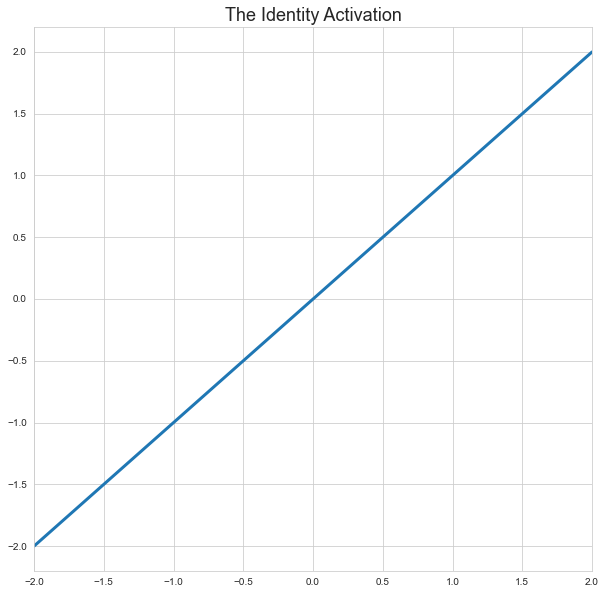

In [12]:
## First the identity
## which is technically not nonlinear but whatever
plt.figure(figsize=(10,10))

plt.plot(np.linspace(-2,2,100),np.linspace(-2,2,100), linewidth = 3)

plt.xlim(-2,2)

plt.title("The Identity Activation",fontsize=18)

plt.show()

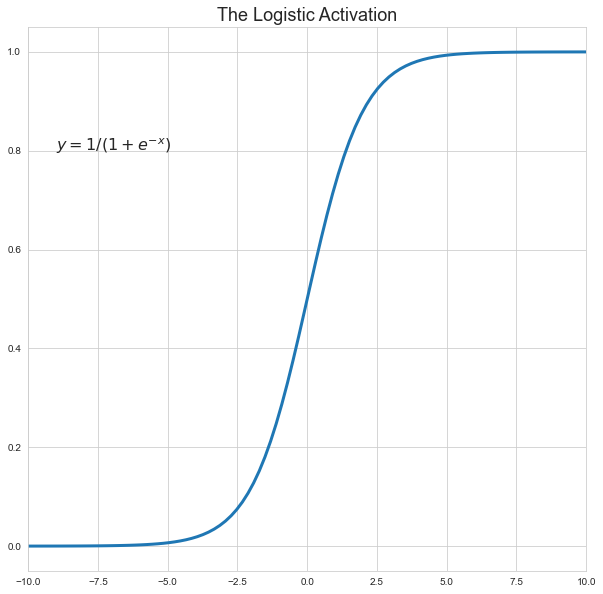

In [13]:
## the logistic function
plt.figure(figsize=(10,10))

x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y, linewidth = 3)

plt.xlim(-10,10)

plt.text(-9,.8,"$y = 1/(1+e^{-x})$", fontsize=16)

plt.title("The Logistic Activation",fontsize=18)

plt.show()

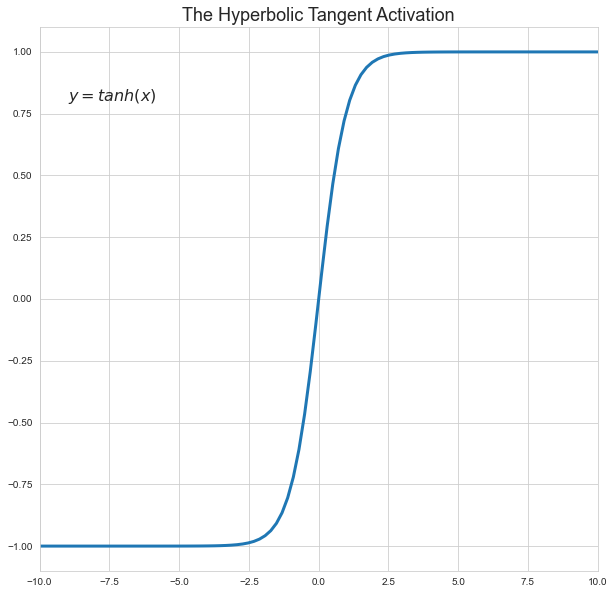

In [14]:
## the hyperbolic tan function
plt.figure(figsize=(10,10))

x = np.linspace(-10,10,100)
y = np.tanh(x)

plt.plot(x,y, linewidth = 3)

plt.xlim(-10,10)

plt.text(-9,.8,"$y = tanh(x)$", fontsize=16)

plt.title("The Hyperbolic Tangent Activation",fontsize=18)

plt.show()

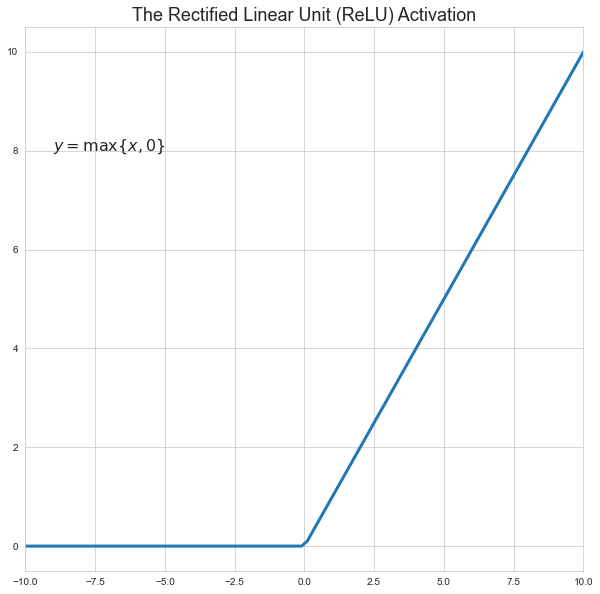

In [15]:
## the Rectified Linear Unit [ReLU] function
plt.figure(figsize=(10,10))

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
y[x<0] = 0

plt.plot(x,y, linewidth = 3)

plt.xlim(-10,10)

plt.text(-9,8,"$y = \max\{x,0\}$", fontsize=16)

plt.title("The Rectified Linear Unit (ReLU) Activation",fontsize=18)

plt.show()

The default in both `sklearn`'s `MLPRegressor` and `MLPClassifier` is ReLU.

## Universal approximator

It has been proven mathematically that "a feed-forward network with a single hidden layer containing a finite number of neurons can approximate continuous functions on compact subsets of $\mathbb{R}^n$, under mild assumptions on the activation function. The theorem thus states that simple neural networks can represent a wide variety of interesting functions when given appropriate parameters", <a href="https://en.wikipedia.org/wiki/Universal_approximation_theorem">https://en.wikipedia.org/wiki/Universal_approximation_theorem</a>.

So we have done it! We have found the best machine learning algorithm and we should end here.

Continuing on from wikipedia: "however, it does not touch upon the algorithmic learnability of those parameters."

Meaning that while yes we can theoretically approximate any reasonable function with a high enough dimensional single hidden layer feed forward network, this is not always practically possible.

### Deep learning

It has been found that you can trade in the height of a single hidden layer for increased depth and get similar results. Wanting to understand the possibilities and limitations of such architecture is where the field of deep learning comes from.

Which leads us to the deficiencies of feed forward networks in practice.

## Deficiencies

1. Feed Forward Neural Nets can very easily overfit the training data. This can be controlled for with a variety of techniques.

2. Gradients can vanish or explode when your networks get too deep because of the chain rule.

3. Convergence can be slow and difficult.

4. Cost functions often have many local minima that you can get stuck in when using normal gradient descent with a fixed learning rate.

5. For complicated networks a normal laptop may not suffice and you'll need more powerful hardware.

## References

The following were extremely helpful in understanding multilayer neural nets.

This entire 4 video youtube series, <a href="https://www.youtube.com/watch?v=aircAruvnKk">https://www.youtube.com/watch?v=aircAruvnKk</a>.

This blog post, <a href="https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/">https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/</a>.

This online book <a href="http://neuralnetworksanddeeplearning.com/chap2.html">http://neuralnetworksanddeeplearning.com/chap2.html</a>.

And the book mentioned in the perceptron notebook <a href="https://link.springer.com/content/pdf/10.1007/978-3-319-94463-0.pdf">https://link.springer.com/content/pdf/10.1007/978-3-319-94463-0.pdf</a>.


--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)